In [1]:
    from main import *
    import matplotlib
    import matplotlib.pyplot as plt

    matplotlib.rcParams["figure.figsize"] = [20,15]
    matplotlib.rcParams.update({'font.size': 20})

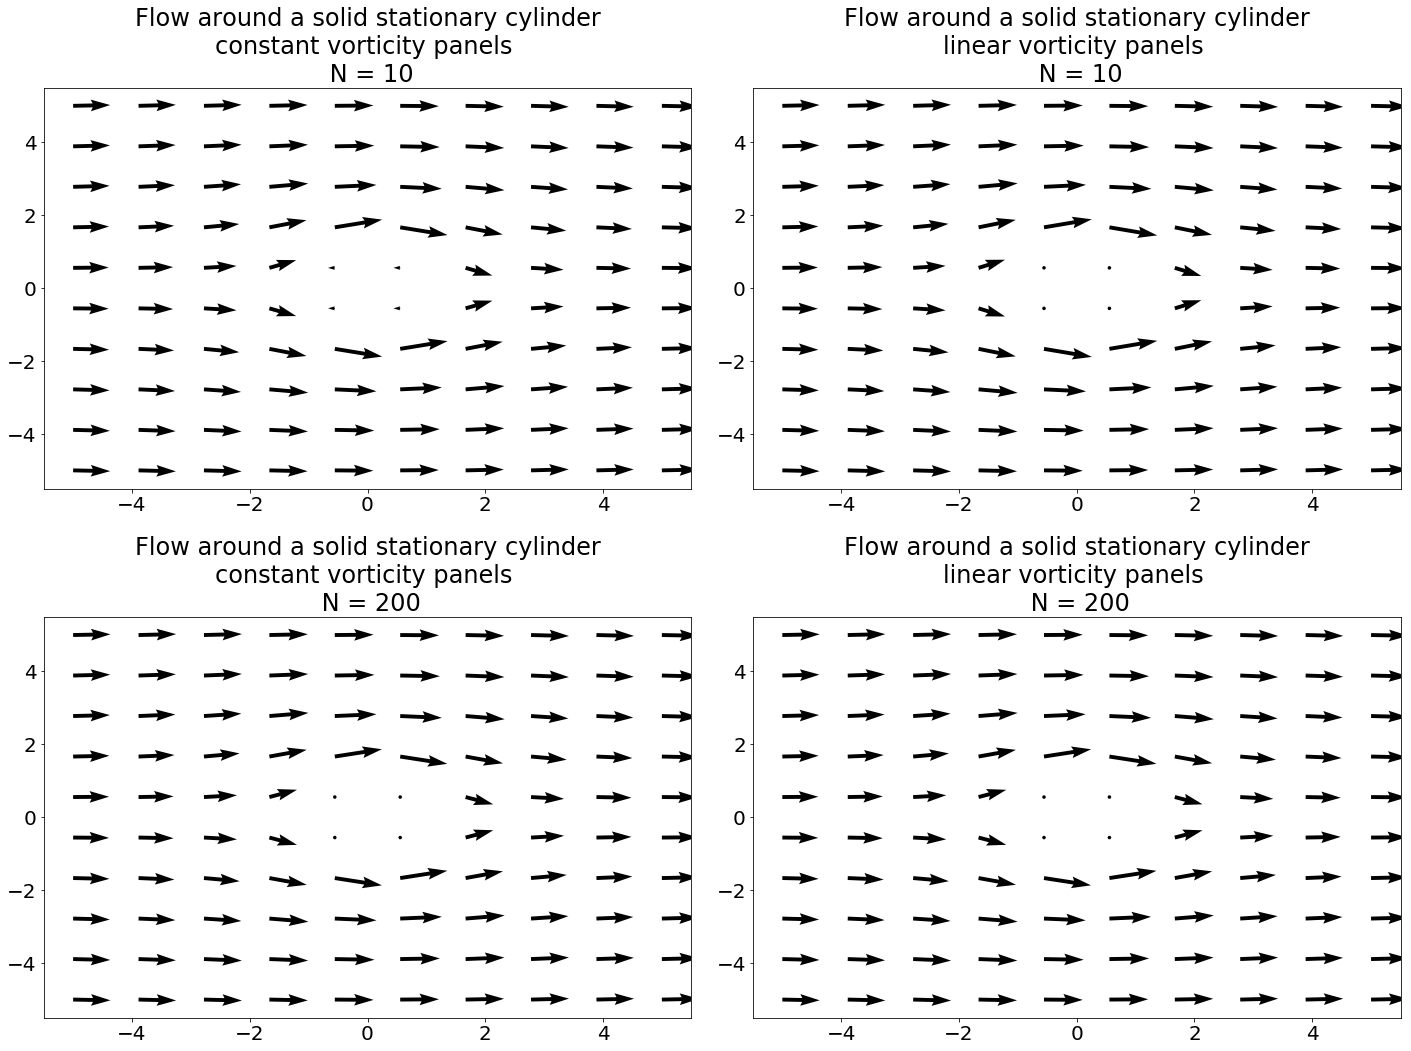

In [2]:
def solve1(n = 10,typ="constant"):    
    thetas = np.linspace(0,2*np.pi,n+1)[:-1]
    z = np.cos(thetas) + 1j*np.sin(thetas)
    za = np.roll(z,-1).tolist()
    zb = np.roll(z, 1).tolist()
    z  = z.tolist()

    b = body(v=0.0+0.0j)
    if typ == "constant":
        panels = [const_panel(b, zb[i], z[i], 0.0) for i in xrange(n)]
    elif typ == "linear":
        panels = [hat_panel(b, za[i], z[i], zb[i], 0.0) for i in xrange(n)]
    s = system(bodies = [b])
    s.add_particle(uniform())

    s.solvePanel()
    return s

fig,axs = plt.subplots(ncols=2, nrows=2)
for n, ax, typ in zip([10,10, 200, 200], axs.flatten(), ["constant", "linear", "constant", "linear"]):
    title = "Flow around a solid stationary cylinder\n" + typ + " vorticity panels \n N = " + str(n)
    ax.set_title(title)
    s = solve1(n=n,typ=typ)
    x = np.linspace(-5,5,10)
    y = np.linspace(5,-5,10)
    X,Y = np.meshgrid(x,y)
    Z = X + 1j*Y
    Z = Z.tolist()
    V = np.zeros([10,10], dtype='complex128').tolist()
    for i in xrange(10):
        for j in xrange(10):
            V[i][j] = s.get_vel(Z[i][j],inc_panel=True)

    ax.quiver(X,Y,np.real(V), np.imag(V))
plt.tight_layout()
plt.show()


In [3]:
N = 15
def vr(r, theta, R=1.0):
    return 1*(1-(R/r)**2)*math.cos(theta)
def vt(r, theta, R=1.0):
    return -1*(1+(R/r)**2)*math.sin(theta)

R = np.linspace(1,5,N).tolist()
Theta = np.linspace(0,2*np.pi, 200).tolist()
fig, axs = plt.subplots(ncols=2, nrows=2,subplot_kw=dict(projection='polar'))

for n, ax, typ in zip([10,10, 200, 200], axs.flatten(), ["constant", "linear", "constant", "linear"]):    
    title = "Errors\n" + typ + " vorticity panels \n N = " + str(n)
    ax.set_title(title)
    vsim = []
    vth  = []
    err  = []
    s = solve1(n,typ)
    err = np.zeros([200,N]).tolist()
    for i,r in enumerate(R):
        for j,theta in enumerate(Theta):
            x = r*math.cos(theta)
            y = r*math.sin(theta)

            vsim.append(abs(s.get_vel(x+1j*y,inc_panel=True)))
            vth.append(abs(vr(r,theta) +1j*vt(r,theta)))
            err[j][i] = vsim[-1]-vth[-1]

    Rm,Thetam = np.meshgrid(R,Theta)

    ax.set_rlim([0,5])
    p1 = ax.contourf(Thetam,Rm,err)
cbar = fig.colorbar(p1,ax=ax)
plt.tight_layout()
plt.show()

(0.581899291226+3.34801630864e-16j)
(0.582172070147+1.2490009027e-16j)
(0.539911897622+1.47017814589e-16j)
(0.533469174853-4.752058122e-15j)


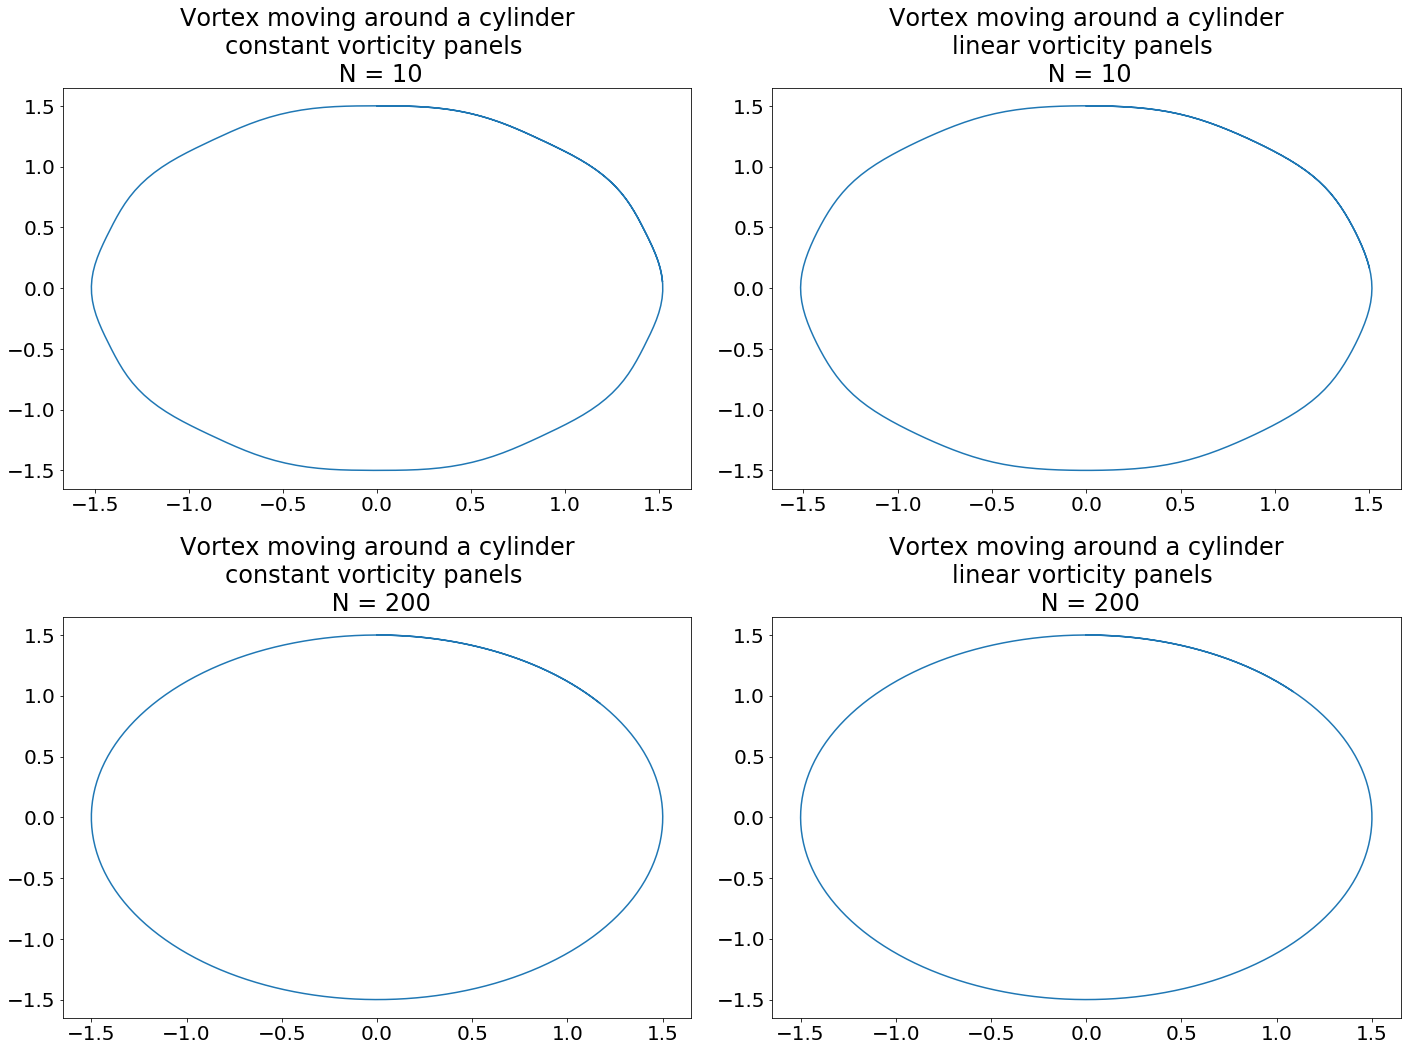

In [19]:
fig,axs = plt.subplots(ncols=2, nrows=2)
for n, ax, typ in zip([10,10, 200, 200], axs.flatten(), ["constant", "linear", "constant", "linear"]):
    title = "Vortex moving around a cylinder\n" + typ + " vorticity panels \n N = " + str(n)
    ax.set_title(title)
    thetas = np.linspace(0,2*np.pi,n+1)[:-1]
    z = np.cos(thetas) + 1j*np.sin(thetas)
    za = np.roll(z,-1).tolist()
    zb = np.roll(z, 1).tolist()
    z  = z.tolist()

    b = body(v=0.0+0.0j)
    if typ == "constant":
        panels = [const_panel(b, zb[i], z[i], 0.0) for i in xrange(n)]
    elif typ == "linear":
        panels = [hat_panel(b, za[i], z[i], zb[i], 0.0) for i in xrange(n)]
    s = system(bodies = [b])
    s.add_particle(vortex(z=1.50j, strength=2*np.pi))

    s.solvePanel()
    print s.get_vel(s.particles[0].z, inc_panel=True)
    s.simulate(0.1,20)
    v = np.array(s.particles[-1].Z)
    ax.plot(np.real(v), np.imag(v))

plt.tight_layout()
plt.show()

Analytically, velocity should be 8/15 = 0.533 in the y direction (using method of images. One vortex at distance 2/3 from origin in line with the main vortex and one at origin. Opposite signs. Velocity induced due to each of the vortices on the main vortex is added)
Thus, a high number of linear velocity panels performs best, as expected.